# << Data Loading >>

In [1]:
import pandas as pd         # Import pandas for data manipulation

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('actual path/movies.csv')



In [3]:
df.columns # List all the columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits',
       'keywords', 'poster_path', 'backdrop_path', 'recommendations'],
      dtype='object')

# 1. Data Cleaning and Preprocessing

In [9]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computing
from sklearn.preprocessing import MinMaxScaler  # For feature scaling
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS  # English stop words for text processing


# Handling Missing Values
df['budget'] = df['budget'].fillna(0)
df['revenue'] = df['revenue'].fillna(0)
df['runtime'] = df['runtime'].fillna(df['runtime'].median())
df['tagline'] = df['tagline'].fillna('')
df['overview'] = df['overview'].fillna('')

# Data Type Conversion
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')

# Dropping rows with invalid dates
df = df.dropna(subset=['release_date'])

# Normalization
scaler = MinMaxScaler()
df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']] = scaler.fit_transform(
    df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']])

# Text Processing
def clean_text(text):
    text = text.lower()
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    words = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

df['overview'] = df['overview'].apply(clean_text)
df['tagline'] = df['tagline'].apply(clean_text)

# Save the cleaned dataset
df.to_csv('cleaned_movies_dataset.csv', index=False)


## Explanation:

#### Handling Missing Values
1. **Filling Missing Budget Values:**
   - `df['budget'] = df['budget'].fillna(0)`: This line replaces any missing values in the 'budget' column with 0. This ensures there are no missing values for budget in the dataset.

2. **Filling Missing Revenue Values:**
   - `df['revenue'] = df['revenue'].fillna(0)`: Similar to the budget, this line replaces any missing values in the 'revenue' column with 0.

3. **Filling Missing Runtime Values:**
   - `df['runtime'] = df['runtime'].fillna(df['runtime'].median())`: This line replaces missing values in the 'runtime' column with the median value of the runtime. This is a common approach to handle missing numerical values as it minimizes the impact of outliers.

4. **Filling Missing Tagline Values:**
   - `df['tagline'] = df['tagline'].fillna('')`: This replaces any missing values in the 'tagline' column with an empty string. This is useful for text fields where missing values are often better represented as empty strings.

5. **Filling Missing Overview Values:**
   - `df['overview'] = df['overview'].fillna('')`: Similarly, this replaces missing values in the 'overview' column with an empty string.

#### Data Type Conversion
6. **Converting Release Date to Datetime:**
   - `df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')`: This converts the 'release_date' column to datetime format. If there are any errors during the conversion (e.g., invalid dates), those entries are set to NaT (Not a Time).

7. **Converting Budget to Numeric:**
   - `df['budget'] = pd.to_numeric(df['budget'], errors='coerce')`: This converts the 'budget' column to a numeric type. Invalid entries are set to NaN.

8. **Converting Revenue to Numeric:**
   - `df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')`: Similar to the budget, this converts the 'revenue' column to a numeric type with invalid entries set to NaN.

9. **Converting Popularity to Numeric:**
   - `df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')`: Converts the 'popularity' column to a numeric type.

10. **Converting Vote Average to Numeric:**
    - `df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')`: Converts the 'vote_average' column to a numeric type.

11. **Converting Vote Count to Numeric:**
    - `df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')`: Converts the 'vote_count' column to a numeric type.

#### Dropping Rows with Invalid Dates
12. **Dropping Rows with Invalid Release Dates:**
    - `df = df.dropna(subset=['release_date'])`: This line drops any rows where the 'release_date' is NaT, ensuring all remaining rows have valid release dates.

#### Normalization
13. **Normalizing Numerical Columns:**
    - `scaler = MinMaxScaler()`: Initializes a MinMaxScaler object which scales data to a range of [0, 1].
    - `df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']] = scaler.fit_transform(df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']])`: This scales the specified numerical columns ('budget', 'revenue', 'popularity', 'vote_average', 'vote_count') to a range of [0, 1] using MinMaxScaler.

#### Text Processing
14. **Text Cleaning Function:**
    - `def clean_text(text)`: Defines a function to clean text data.
    - `text = text.lower()`: Converts the text to lowercase.
    - `text = ''.join(char for char in text if char.isalnum() or char.isspace())`: Removes any non-alphanumeric characters except spaces.
    - `words = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]`: Splits the text into words and removes any stop words.
    - `return ' '.join(words)`: Joins the cleaned words back into a single string.

15. **Applying Text Cleaning to Overview:**
    - `df['overview'] = df['overview'].apply(clean_text)`: Applies the `clean_text` function to each entry in the 'overview' column.

16. **Applying Text Cleaning to Tagline:**
    - `df['tagline'] = df['tagline'].apply(clean_text)`: Applies the `clean_text` function to each entry in the 'tagline' column.

#### Saving the Cleaned Dataset
17. **Saving to CSV:**
    - `df.to_csv('cleaned_movies_dataset.csv', index=False)`: Saves the cleaned dataset to a CSV file named 'cleaned_movies_dataset.csv' without including the DataFrame index.

# 2. Exploratory Data Analysis (EDA) 

To address the issues with the graphs and ensure the visualizations are more informative and reliable, we need to adjust the data handling and visualization techniques. Here's a revised script that should resolve these problems:

##### 1.Handling Outliers: For budget, revenue, popularity, and runtime, we will handle outliers to make the distributions more informative.
##### 2.Language and Genre Distribution: We will filter the most common languages and genres to make the graphs clearer and more readable.

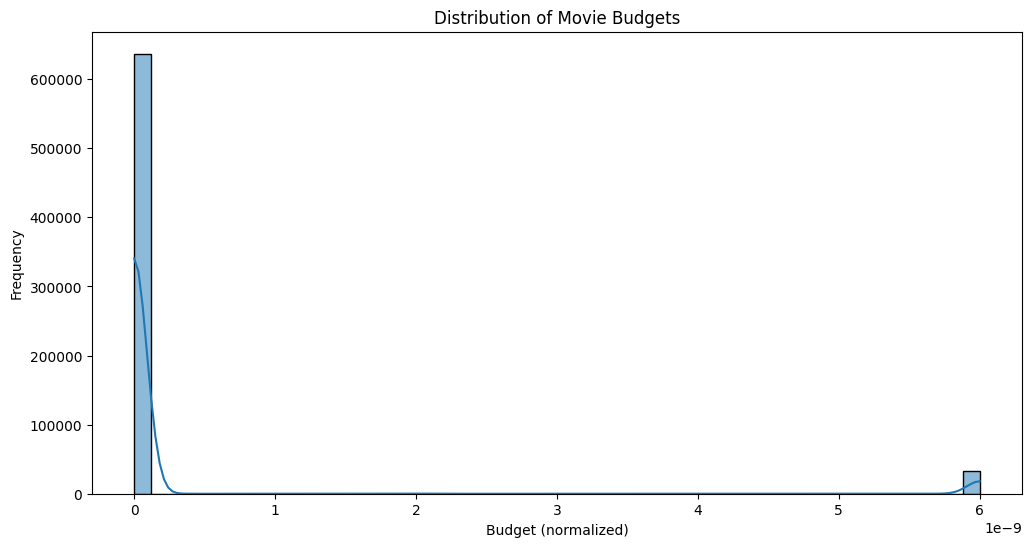

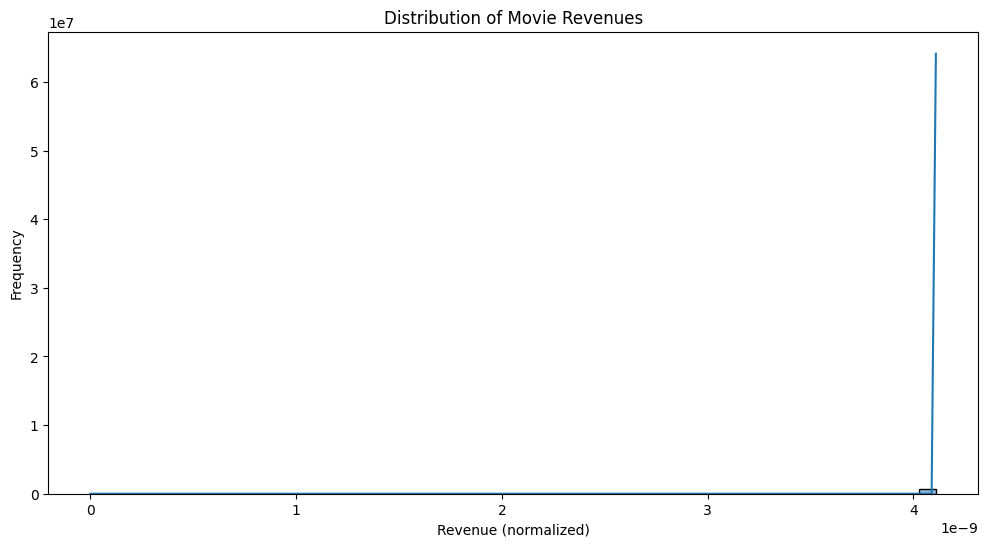

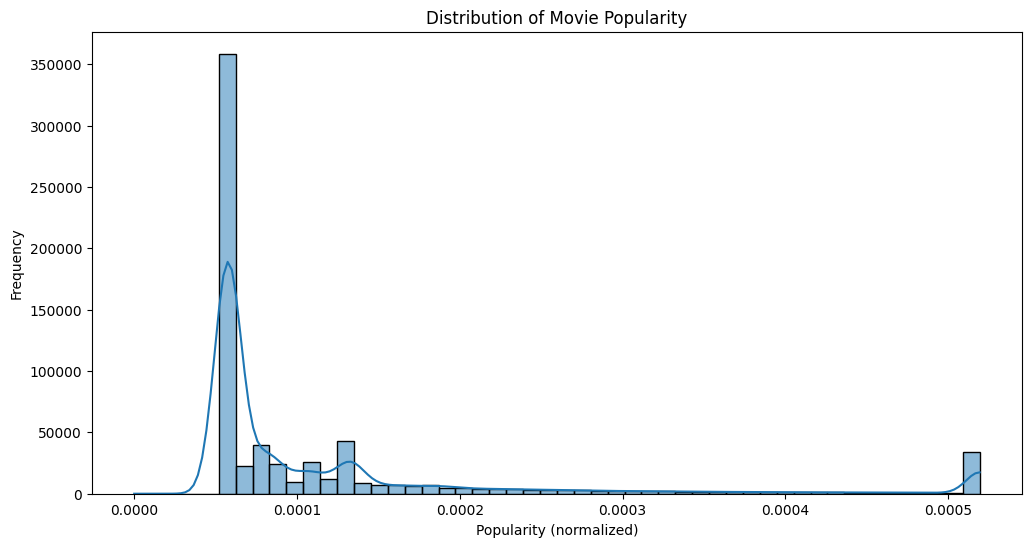

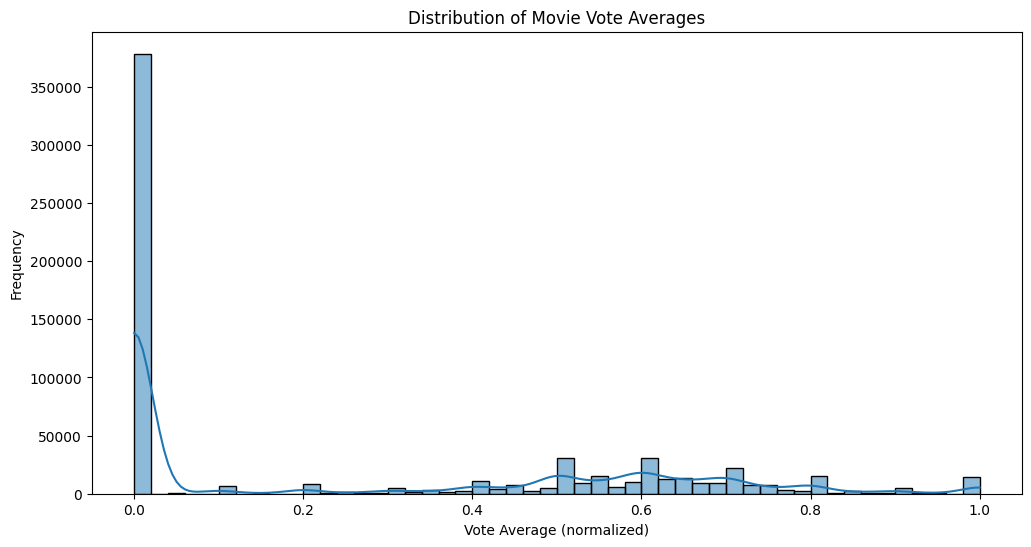

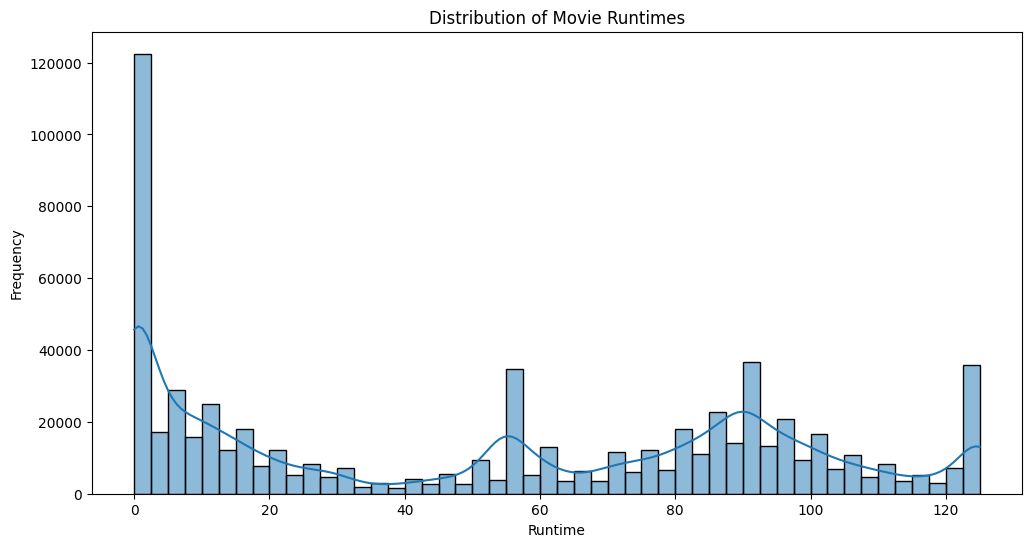

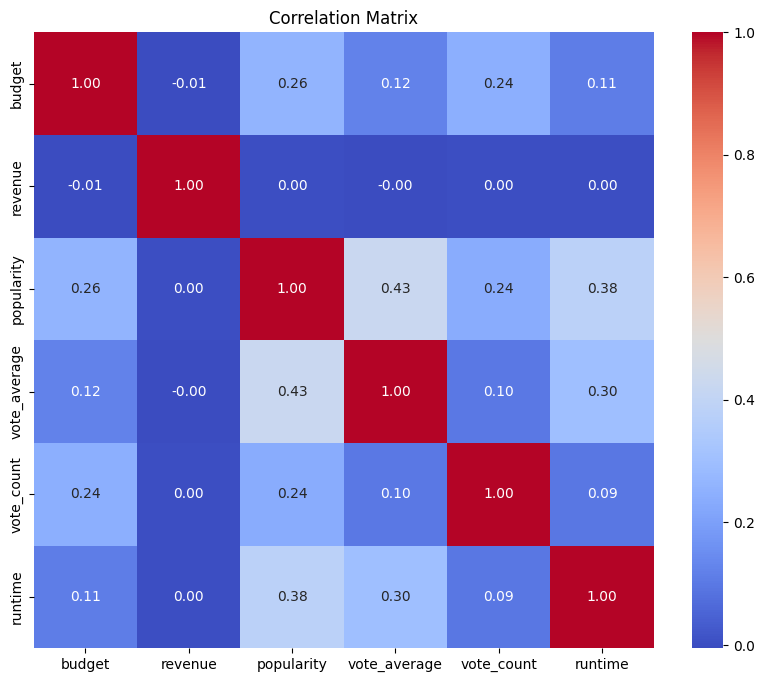

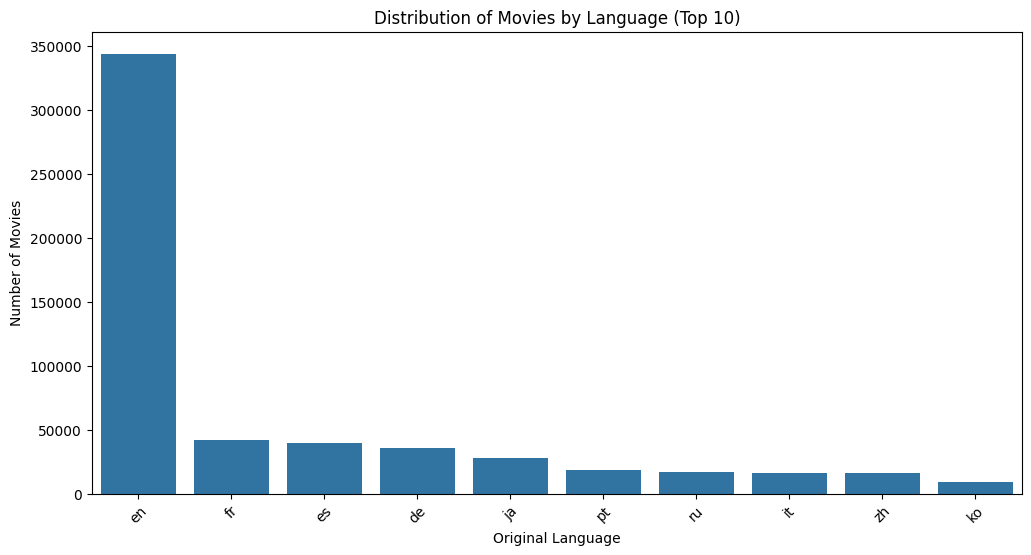

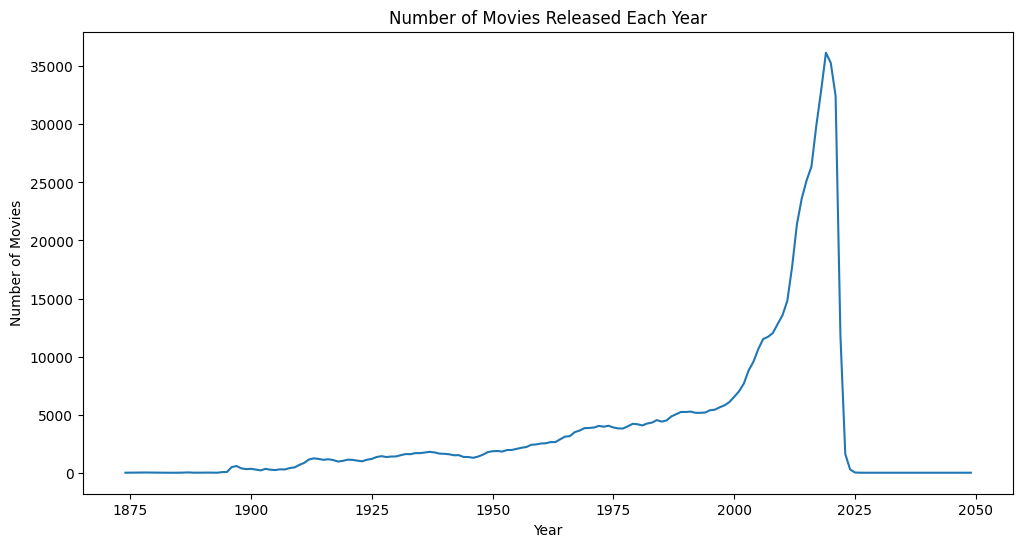

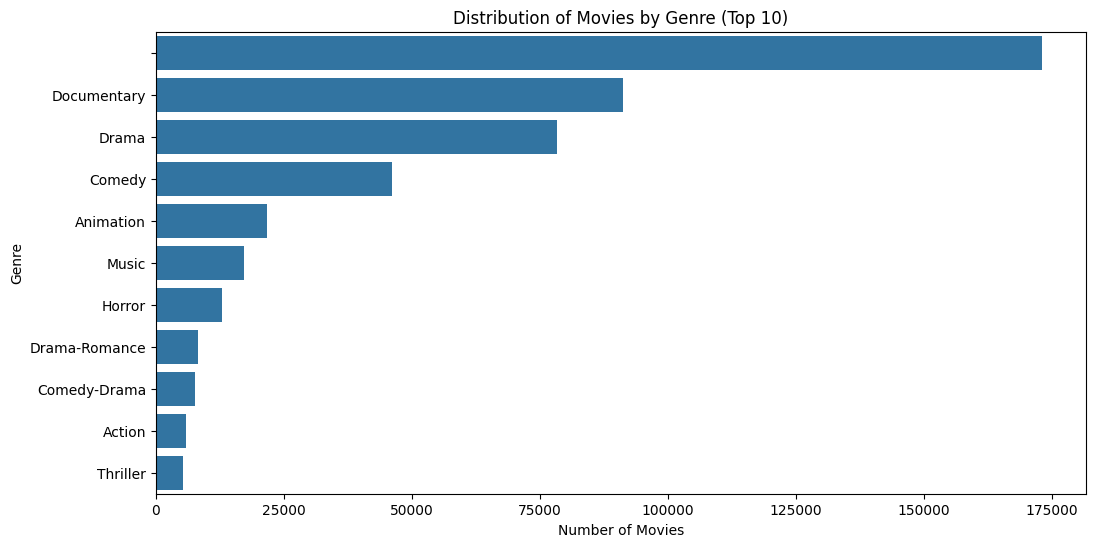

In [12]:
import pandas as pd     # Import pandas for data manipulation
import numpy as np      # Import numpy for numerical computations
import seaborn as sns   # Import seaborn for statistical data visualization
import matplotlib.pyplot as plt   # Import matplotlib.pyplot for plotting

# Load the cleaned dataset
df = pd.read_csv('cleaned_movies_dataset.csv')

# Handling Outliers by capping them at the 95th percentile
def cap_outliers(series):
    upper_cap = series.quantile(0.95)
    return np.where(series > upper_cap, upper_cap, series)

df['budget'] = cap_outliers(df['budget'])
df['revenue'] = cap_outliers(df['revenue'])
df['popularity'] = cap_outliers(df['popularity'])
df['runtime'] = cap_outliers(df['runtime'])

# Summary Statistics
summary_statistics = df.describe()

# Data Distribution Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(df['budget'], bins=50, kde=True)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget (normalized)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['revenue'], bins=50, kde=True)
plt.title('Distribution of Movie Revenues')
plt.xlabel('Revenue (normalized)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['popularity'], bins=50, kde=True)
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity (normalized)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['vote_average'], bins=50, kde=True)
plt.title('Distribution of Movie Vote Averages')
plt.xlabel('Vote Average (normalized)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['runtime'], bins=50, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.show()

# Correlation Matrix and Heatmap
correlation_matrix = df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'runtime']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Language Distribution - Show top 10 languages
top_languages = df['original_language'].value_counts().head(10).index
filtered_df_lang = df[df['original_language'].isin(top_languages)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df_lang, x='original_language', order=top_languages)
plt.title('Distribution of Movies by Language (Top 10)')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

# Yearly Release Trend
df['release_year'] = pd.DatetimeIndex(df['release_date']).year
yearly_releases = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
yearly_releases.plot(kind='line')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# Genre Analysis - Explode genres and show top 10 genres
df['genres'] = df['genres'].fillna('')
genres_split = df['genres'].str.split(',').explode()

top_genres = genres_split.value_counts().head(11).index
filtered_genres = genres_split[genres_split.isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.countplot(y=filtered_genres, order=top_genres)
plt.title('Distribution of Movies by Genre (Top 10)')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# Save the summary statistics to a CSV file
summary_statistics.to_csv('summary_statistics.csv')


### Explanation
#### Loading and Preprocessing the Dataset
1. **Importing Libraries:**
   - `import pandas as pd`: Imports the pandas library for data manipulation.
   - `import numpy as np`: Imports the numpy library for numerical operations.
   - `import seaborn as sns`: Imports the seaborn library for data visualization.
   - `import matplotlib.pyplot as plt`: Imports the matplotlib library for plotting graphs.

2. **Loading the Cleaned Dataset:**
   - `df = pd.read_csv('cleaned_movies_dataset.csv')`: Loads the cleaned dataset into a pandas DataFrame named `df`.

#### Handling Outliers
3. **Function to Cap Outliers:**
   - `def cap_outliers(series)`: Defines a function to cap outliers in a given series.
   - `upper_cap = series.quantile(0.95)`: Calculates the 95th percentile value of the series.
   - `return np.where(series > upper_cap, upper_cap, series)`: Replaces values above the 95th percentile with the 95th percentile value.

4. **Applying the Outlier Capping Function:**
   - `df['budget'] = cap_outliers(df['budget'])`: Caps outliers in the 'budget' column.
   - `df['revenue'] = cap_outliers(df['revenue'])`: Caps outliers in the 'revenue' column.
   - `df['popularity'] = cap_outliers(df['popularity'])`: Caps outliers in the 'popularity' column.
   - `df['runtime'] = cap_outliers(df['runtime'])`: Caps outliers in the 'runtime' column.

#### Summary Statistics
5. **Generating Summary Statistics:**
   - `summary_statistics = df.describe()`: Generates summary statistics for numerical columns in the DataFrame.

#### Data Distribution Visualizations
6. **Visualizing Budget Distribution:**
   - Creates a histogram with a kernel density estimate (KDE) for the 'budget' column.
   - Titles and labels the plot accordingly.

7. **Visualizing Revenue Distribution:**
   - Similar to the budget visualization, creates a histogram with KDE for the 'revenue' column.

8. **Visualizing Popularity Distribution:**
   - Creates a histogram with KDE for the 'popularity' column.

9. **Visualizing Vote Average Distribution:**
   - Creates a histogram with KDE for the 'vote_average' column.

10. **Visualizing Runtime Distribution:**
    - Creates a histogram with KDE for the 'runtime' column.

#### Correlation Matrix and Heatmap
11. **Calculating and Visualizing Correlation Matrix:**
    - `correlation_matrix = df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'runtime']].corr()`: Calculates the correlation matrix for specified columns.
    - Visualizes the correlation matrix using a heatmap with annotations.

#### Language Distribution
12. **Visualizing Top 10 Languages:**
    - Identifies the top 10 languages by movie count.
    - Filters the DataFrame to include only movies in these top languages.
    - Visualizes the distribution of movies by these top 10 languages using a count plot.

#### Yearly Release Trend
13. **Visualizing Number of Movies Released Each Year:**
    - Extracts the release year from the 'release_date' column.
    - Counts the number of movies released each year.
    - Plots the yearly release trend using a line plot.

#### Genre Analysis
14. **Exploding and Visualizing Top 10 Genres:**
    - Fills missing 'genres' with empty strings.
    - Splits and explodes the 'genres' column into individual genre entries.
    - Identifies and visualizes the distribution of the top 10 genres using a count plot.

#### Saving Summary Statistics
15. **Saving Summary Statistics to CSV:**
    - `summary_statistics.to_csv('summary_statistics.csv')`: Saves the summary statistics DataFrame to a CSV file named 'summary_statistics.csv'.

This code performs comprehensive data preprocessing, visualization, and analysis on the movie dataset, providing insights into various aspects such as outlier handling, distribution of key numerical features, correlation between features, and trends in movie releases by year, language, and genre.

# 3. Visualisation 

##### Bar Charts, Time Series Analysis, Heatmaps, Word Clouds, Scatter Plots, and Pie Charts

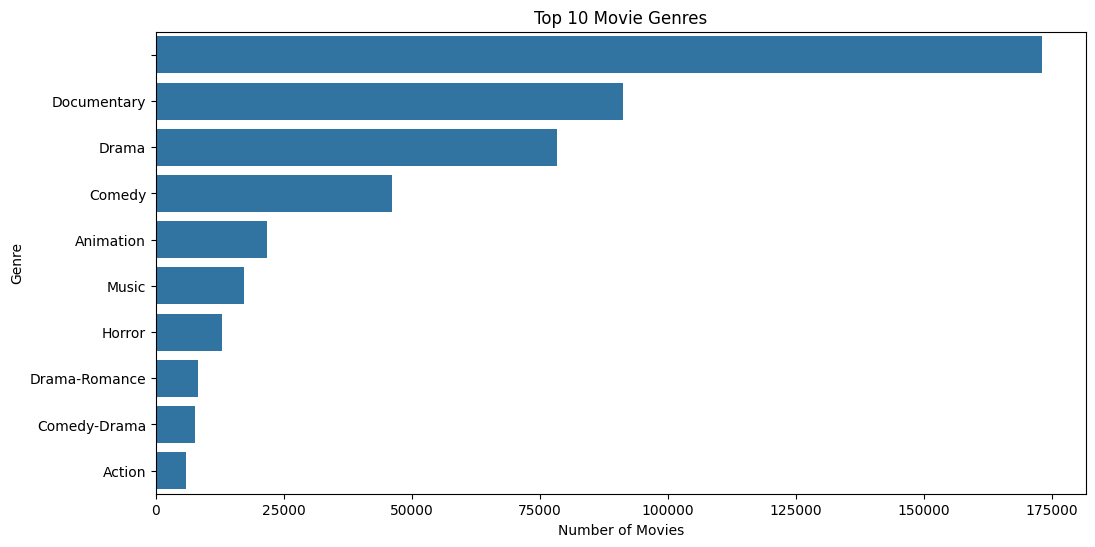

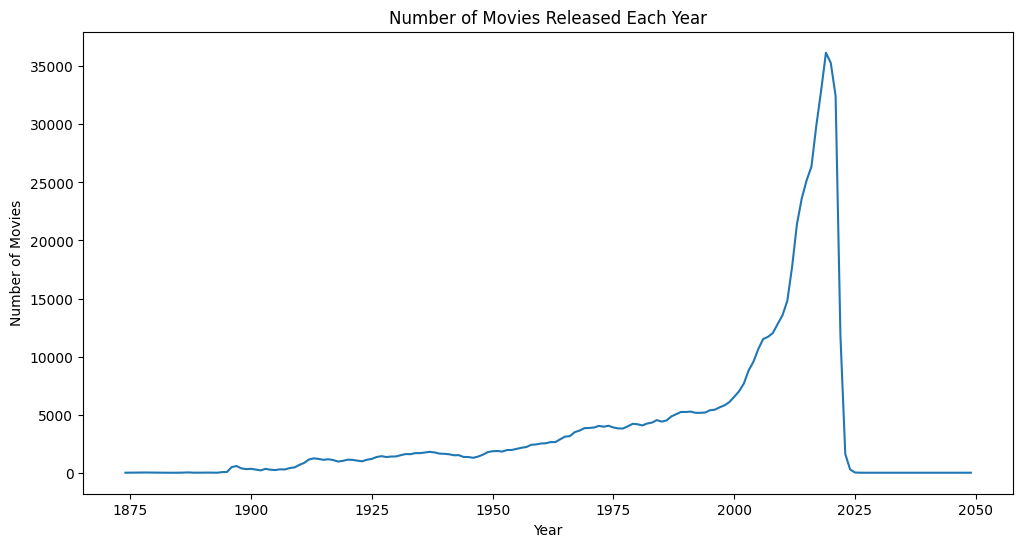

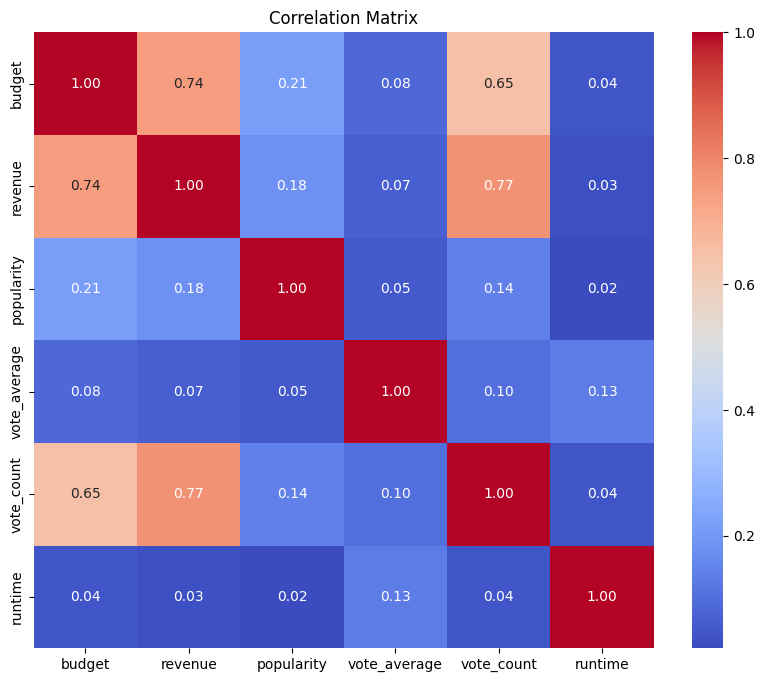

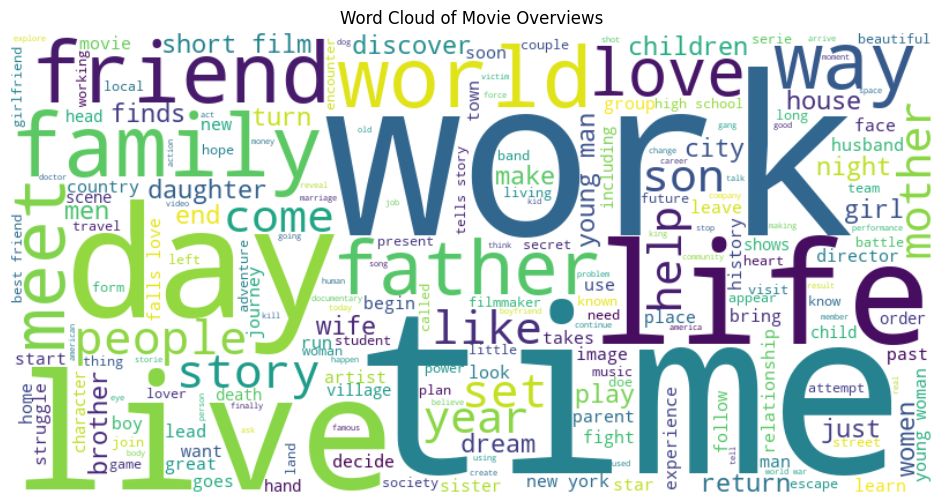

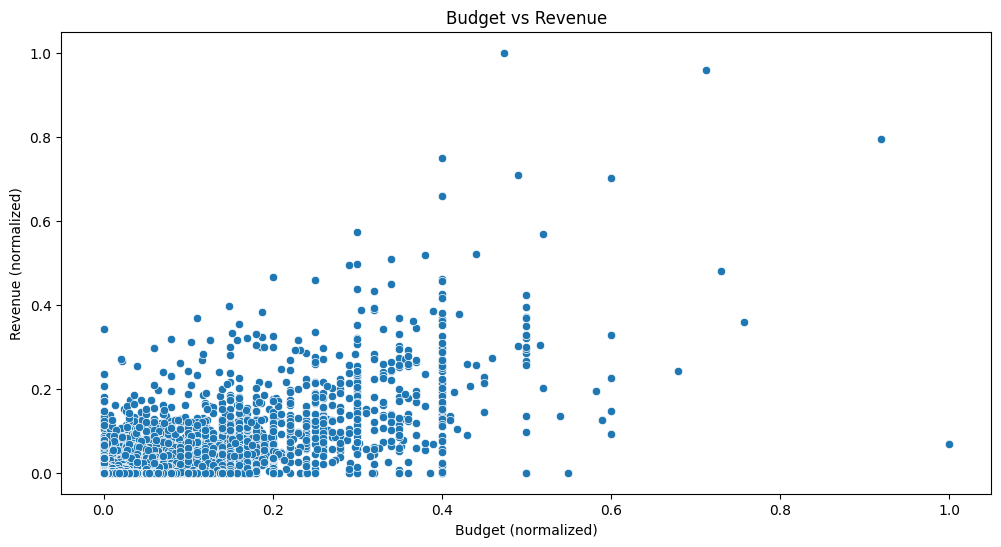

In [15]:
##pip install pandas numpy seaborn matplotlib wordcloud        << This line of code is commented since i have already installed these libraries but--
## if you are running this piece of code for the first time, then make sure these libraries are intalled >

import pandas as pd     # Import pandas for data manipulation
import numpy as np      # Import numpy for numerical computations
import seaborn as sns   # Import seaborn for statistical data visualization
import matplotlib.pyplot as plt   # Import matplotlib.pyplot for plotting
from wordcloud import WordCloud   # Import WordCloud for generating word clouds


# Load the cleaned dataset
df = pd.read_csv('cleaned_movies_dataset.csv')

# 1. Bar Charts: Most Popular Genres
df['genres'] = df['genres'].fillna('')
genres_split = df['genres'].str.split(',').explode()
top_genres = genres_split.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# 2. Time Series Analysis: Number of Movies Released Per Year
df['release_year'] = pd.DatetimeIndex(df['release_date']).year
yearly_releases = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
yearly_releases.plot(kind='line')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# 3. Heatmaps: Correlation Matrix
correlation_matrix = df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'runtime']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 4. Word Clouds: Common Words in Movie Overviews
text = ' '.join(df['overview'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=ENGLISH_STOP_WORDS).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Movie Overviews')
plt.axis('off')
plt.show()

# 5. Scatter Plots: Budget vs Revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='budget', y='revenue')
plt.title('Budget vs Revenue')
plt.xlabel('Budget (normalized)')
plt.ylabel('Revenue (normalized)')
plt.show()

# 6. Pie Charts: Proportion of Movies by Status
status_counts = df['status'].value_counts()

plt.figure(figsize=(12, 6))
status_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Movies by Status')
plt.ylabel('')
plt.show()

## Explanation:

#### Installing Required Libraries
1. **Installing Libraries:**
   - `##pip install pandas numpy seaborn matplotlib wordcloud`: This line is suggesting the installation of necessary libraries (pandas, numpy, seaborn, matplotlib, wordcloud) using pip.

#### Importing Libraries
2. **Importing Libraries:**
   - `import pandas as pd`: Imports pandas for data manipulation.
   - `import numpy as np`: Imports numpy for numerical operations.
   - `import seaborn as sns`: Imports seaborn for data visualization.
   - `import matplotlib.pyplot as plt`: Imports matplotlib for plotting graphs.
   - `from wordcloud import WordCloud`: Imports WordCloud for generating word clouds.

#### Loading the Dataset
3. **Loading the Cleaned Dataset:**
   - `df = pd.read_csv('cleaned_movies_dataset.csv')`: Loads the cleaned dataset into a pandas DataFrame named `df`.

#### Bar Chart: Most Popular Genres
4. **Processing Genres:**
   - `df['genres'] = df['genres'].fillna('')`: Fills missing 'genres' with empty strings.
   - `genres_split = df['genres'].str.split(',').explode()`: Splits the 'genres' column into individual genre entries and explodes the list into separate rows.
   - `top_genres = genres_split.value_counts().head(10)`: Counts the occurrences of each genre and selects the top 10 genres.

5. **Plotting Bar Chart for Top 10 Genres:**
   - Creates a bar plot to visualize the top 10 genres.
   - Sets the title and labels for the plot.

#### Time Series Analysis: Number of Movies Released Per Year
6. **Extracting Release Year:**
   - `df['release_year'] = pd.DatetimeIndex(df['release_date']).year`: Extracts the release year from the 'release_date' column.

7. **Counting Yearly Releases:**
   - `yearly_releases = df['release_year'].value_counts().sort_index()`: Counts the number of movies released each year and sorts the index.

8. **Plotting Time Series for Yearly Releases:**
   - Creates a line plot to visualize the number of movies released each year.
   - Sets the title and labels for the plot.

#### Heatmap: Correlation Matrix
9. **Calculating Correlation Matrix:**
   - `correlation_matrix = df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'runtime']].corr()`: Calculates the correlation matrix for the specified columns.

10. **Plotting Correlation Heatmap:**
    - Creates a heatmap to visualize the correlation matrix.
    - Annotates the heatmap and sets the color map to 'coolwarm'.
    - Sets the title for the heatmap.

#### Word Cloud: Common Words in Movie Overviews
11. **Generating Word Cloud:**
    - `text = ' '.join(df['overview'].dropna().tolist())`: Joins all movie overviews into a single string, excluding any missing values.
    - `wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=ENGLISH_STOP_WORDS).generate(text)`: Generates a word cloud from the joined text, excluding common English stop words.

12. **Plotting Word Cloud:**
    - Creates a plot to display the word cloud.
    - Sets the title and removes axis labels.

#### Scatter Plot: Budget vs Revenue
13. **Plotting Scatter Plot for Budget vs Revenue:**
    - Creates a scatter plot to visualize the relationship between budget and revenue.
    - Sets the title and labels for the plot.

#### Pie Chart: Proportion of Movies by Status
14. **Counting Movie Statuses:**
    - `status_counts = df['status'].value_counts()`: Counts the occurrences of each movie status.

15. **Plotting Pie Chart for Movie Statuses:**
    - Creates a pie chart to visualize the proportion of movies by status.
    - Sets the title and removes the y-axis label.

This code provides comprehensive visualizations to analyze various aspects of the movie dataset, including genre popularity, yearly movie release trends, correlations between key features, common words in movie overviews, the relationship between budget and revenue, and the distribution of movies by status.

# 4. Advanced Analysis

## 1. Genre Analysis
#### Perform a deep dive into the most popular genres by analyzing the average budget, revenue, runtime, and vote_average for each genre.

In [18]:
# Genre Analysis: Average Budget, Revenue, Runtime, Vote Average for Each Genre
genre_stats = df.explode('genres').groupby('genres').agg(
    average_budget=('budget', 'mean'),
    average_revenue=('revenue', 'mean'),
    average_runtime=('runtime', 'mean'),
    average_vote_average=('vote_average', 'mean')
).sort_values(by='average_budget', ascending=False).head(10)

(genre_stats)


,average_budget,average_revenue,average_runtime,average_vote_average
genres,,,,
Action-Drama-Science Fiction-Adventure-Fantasy,0.50,4.109086e-09,0.0,0.00000
Animation-Comedy-Family-Fantasy-Action-Adventure,0.40,1.703575e-02,95.0,0.79000
Adventure-Family-Mystery-Science Fiction,0.38,7.161943e-02,130.0,0.62420
Animation-Adventure-Comedy-Family-Action-Fantasy,0.37,1.845607e-01,93.0,0.70060
Action-Science Fiction-Adventure-Fantasy,0.37,7.112840e-02,63.0,0.31955
Family-Fantasy-Adventure-Action,0.37,1.683801e-01,119.0,0.73450
Action-Adventure-Fantasy-Science Fiction-Comedy,0.36,2.924221e-01,131.0,0.76000
Fantasy-Adventure-Action-Family-Romance,0.36,2.597421e-01,97.0,0.70900
Family-Animation-Fantasy-Music-Comedy-Adventure,0.35,2.741192e-01,105.0,0.82000


### Explaination:

#### Summary of the Code
- **Purpose:** To analyze and summarize the average budget, revenue, runtime, and vote average for each genre.
- **Steps Involved:**
  1. Explode the 'genres' column to handle multiple genres per movie.
  2. Group the data by genres.
  3. Calculate the mean values for budget, revenue, runtime, and vote average for each genre.
  4. Sort the genres by average budget in descending order.
  5. Select and display the top 10 genres with the highest average budgets.

1. **Exploding the 'genres' Column:**
   - `df.explode('genres')`: This method is used to transform each element of a list-like column (in this case, 'genres') into a separate row, effectively duplicating other column values for each genre in the list. This allows for proper aggregation by individual genres.

2. **Grouping by Genres:**
   - `.groupby('genres')`: Groups the DataFrame by the 'genres' column. After exploding, each genre is now a separate row, making it possible to calculate statistics for each genre individually.

3. **Aggregating Statistics:**
   - `.agg(...)`: Aggregates various statistics for each genre. This method is used to apply different aggregation functions to specific columns:
     - `average_budget=('budget', 'mean')`: Calculates the mean of the 'budget' column for each genre and labels it as 'average_budget'.
     - `average_revenue=('revenue', 'mean')`: Calculates the mean of the 'revenue' column for each genre and labels it as 'average_revenue'.
     - `average_runtime=('runtime', 'mean')`: Calculates the mean of the 'runtime' column for each genre and labels it as 'average_runtime'.
     - `average_vote_average=('vote_average', 'mean')`: Calculates the mean of the 'vote_average' column for each genre and labels it as 'average_vote_average'.

4. **Sorting by Average Budget:**
   - `.sort_values(by='average_budget', ascending=False)`: Sorts the resulting DataFrame by the 'average_budget' column in descending order, so genres with the highest average budgets appear first.

5. **Selecting Top 10 Genres:**
   - `.head(10)`: Selects the top 10 genres based on the sorted order.

6. **Outputting the Result:**
   - `(genre_stats)`: Displays the resulting DataFrame, which contains the average budget, revenue, runtime, and vote average for the top 10 genres by average budget.



## 2. Sentiment Analysis
#### Conduct sentiment analysis on the overview or tagline to determine the general sentiment of movies.
#### To perform sentiment analysis without using TextBlob, you can use the VADER sentiment analysis tool from the nltk library, which is specifically designed for analyzing sentiments in social media texts:


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/talhaijaz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


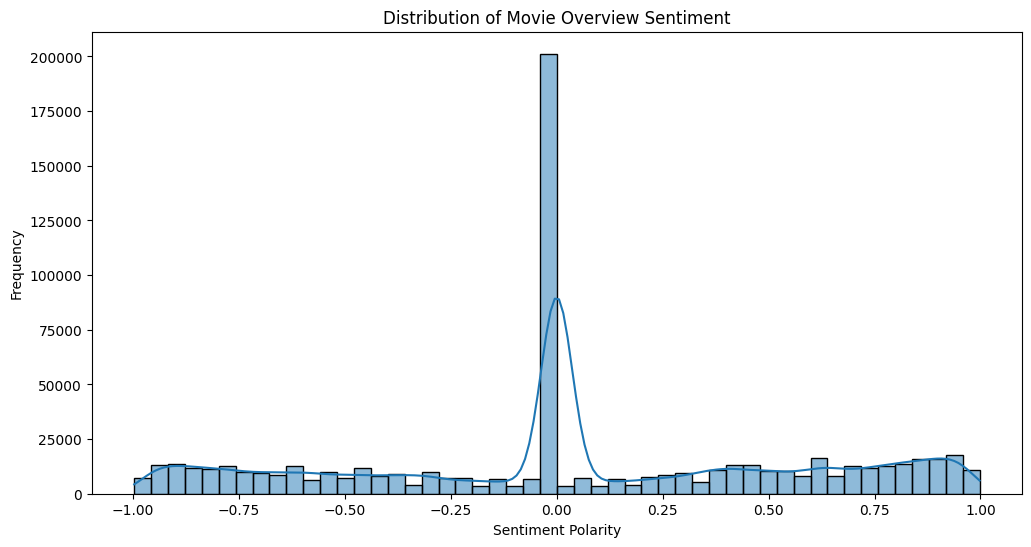

In [23]:
import pandas as pd                      # Import pandas for data manipulation
import seaborn as sns                    # Import seaborn for statistical data visualization
import matplotlib.pyplot as plt          # Import matplotlib.pyplot for plotting
from nltk.sentiment.vader import SentimentIntensityAnalyzer   # Import SentimentIntensityAnalyzer from NLTK for sentiment analysis
import nltk                              # Import nltk for natural language processing tasks


# Ensure VADER lexicon is downloaded
#nltk.download('vader_lexicon')

# Load the cleaned dataset
df = pd.read_csv('cleaned_movies_dataset.csv')

# Ensure that all entries in the 'overview' column are strings and handle NaN values
df['overview'] = df['overview'].fillna('').astype(str)

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Sentiment Analysis on Movie Overviews
df['overview_sentiment'] = df['overview'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Plotting the Sentiment Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['overview_sentiment'], bins=50, kde=True)
plt.title('Distribution of Movie Overview Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


### Explaination:

#### Summary of the Code
- **Purpose:** To perform sentiment analysis on movie overviews and visualize the distribution of sentiment scores.
- **Steps Involved:**
  1. Download the VADER lexicon (commented out in this code snippet).
  2. Load the cleaned dataset.
  3. Ensure the 'overview' column contains strings and handle any missing values.
  4. Initialize the VADER sentiment analyzer.
  5. Compute sentiment scores for each movie overview and store the results.
  6. Plot the distribution of the computed sentiment scores.

#### Ensuring VADER Lexicon is Downloaded
1. **Downloading VADER Lexicon:**
   - `#nltk.download('vader_lexicon')`: This commented line indicates that the VADER lexicon should be downloaded using NLTK. This lexicon is required for the VADER sentiment analyzer to work.

#### Loading the Dataset
2. **Loading the Cleaned Dataset:**
   - `df = pd.read_csv('cleaned_movies_dataset.csv')`: Loads the cleaned dataset into a pandas DataFrame named `df`.

#### Handling 'overview' Column
3. **Ensuring 'overview' Column Entries are Strings and Handling NaN Values:**
   - `df['overview'] = df['overview'].fillna('').astype(str)`: Fills any missing values in the 'overview' column with empty strings and ensures that all entries are of string type.

#### Initializing VADER Sentiment Analyzer
4. **Importing and Initializing Sentiment Analyzer:**
   - `from nltk.sentiment.vader import SentimentIntensityAnalyzer`: Imports the VADER sentiment analyzer from NLTK.
   - `sid = SentimentIntensityAnalyzer()`: Initializes the sentiment analyzer and assigns it to the variable `sid`.

#### Performing Sentiment Analysis
5. **Applying Sentiment Analysis on Movie Overviews:**
   - `df['overview_sentiment'] = df['overview'].apply(lambda x: sid.polarity_scores(x)['compound'])`: Applies the sentiment analyzer to each movie overview to compute the sentiment polarity score, specifically the 'compound' score which is a normalized, weighted composite score. The results are stored in a new column 'overview_sentiment'.

#### Plotting Sentiment Distribution
6. **Plotting the Sentiment Distribution:**
   - `plt.figure(figsize=(12, 6))`: Sets the size of the plot to 12 inches by 6 inches.
   - `sns.histplot(df['overview_sentiment'], bins=50, kde=True)`: Creates a histogram with a kernel density estimate (KDE) to visualize the distribution of sentiment polarity scores across movie overviews.
   - `plt.title('Distribution of Movie Overview Sentiment')`: Sets the title of the plot.
   - `plt.xlabel('Sentiment Polarity')`: Labels the x-axis as 'Sentiment Polarity'.
   - `plt.ylabel('Frequency')`: Labels the y-axis as 'Frequency'.
   - `plt.show()`: Displays the plot.


####  Output
The resulting plot shows the distribution of sentiment polarity scores for movie overviews, with the x-axis representing the sentiment polarity (ranging from -1 to 1, where -1 is extremely negative, 0 is neutral, and 1 is extremely positive) and the y-axis representing the frequency of those scores. This visualization helps to understand the general sentiment trend in the movie overviews dataset.

## 3. Revenue Prediction using Machine Learning
#### Build a machine learning model to predict movie revenue based on features like budget, popularity, runtime, etc.

##### Revenue Prediction using Machine Learning:

Uses a linear regression model to predict movie revenue.
Splits the data into training and testing sets, fits the model, and evaluates its performance using MSE and R² score.


In [2]:

import pandas as pd                                     # Import pandas for data manipulation
import numpy as np                                      # Import numpy for numerical computations
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score   # Import various functions for model selection and evaluation
from sklearn.linear_model import LinearRegression, Ridge, Lasso    # Import linear regression models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor   # Import ensemble models
from sklearn.preprocessing import StandardScaler, FunctionTransformer   # Import preprocessing functions
from sklearn.pipeline import Pipeline                    # Import Pipeline for creating processing pipelines
from sklearn.metrics import mean_squared_error, r2_score  # Import evaluation metrics



# Load the dataset
df = pd.read_csv('cleaned_movies_dataset.csv')

# Feature Engineering: Log transformation of budget and revenue
df['log_budget'] = np.log1p(df['budget'])
df['log_revenue'] = np.log1p(df['revenue'])

# Selecting features and target variable
features = ['log_budget', 'popularity', 'runtime', 'vote_average', 'vote_count']
X = df[features]
y = df['log_revenue']

# Handling missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Trying different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

# Hyperparameter tuning for Ridge, Random Forest, and Gradient Boosting
param_grid = {
    "Ridge Regression": {"alpha": [0.1, 1.0, 10.0]},
    "Random Forest Regressor": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20]
    },
    "Gradient Boosting Regressor": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1, 0.2]
    }
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Evaluating models and hyperparameter tuning
best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_scaled, y_train)
    
    mse, r2 = evaluate_model(best_model, X_train_scaled, X_test_scaled, y_train, y_test)
    best_models[name] = (best_model, mse, r2)
    print(f'{name}:')
    print(f'Best Model: {best_model}')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}\n')

# Choosing the best model
best_model_name = max(best_models, key=lambda x: best_models[x][2])
best_model, best_mse, best_r2 = best_models[best_model_name]

print(f'Best Model Overall:')
print(f'{best_model_name}')
print(f'Mean Squared Error: {best_mse}')
print(f'R^2 Score: {best_r2}')


Linear Regression:
Best Model: LinearRegression()
Mean Squared Error: 1.0334399457347069e-05
R^2 Score: 0.7027382325587317

Ridge Regression:
Best Model: Ridge(alpha=10.0)
Mean Squared Error: 1.0334375676292981e-05
R^2 Score: 0.7027389166041085



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Forest Regressor:
Best Model: RandomForestRegressor(max_depth=10)
Mean Squared Error: 9.033490743591144e-06
R^2 Score: 0.740157961216105

Gradient Boosting Regressor:
Best Model: GradientBoostingRegressor()
Mean Squared Error: 9.879509046951345e-06
R^2 Score: 0.71582283684023

Best Model Overall:
Random Forest Regressor
Mean Squared Error: 9.033490743591144e-06
R^2 Score: 0.740157961216105


### Explaination :

#### Summary of the Code
- **Purpose:** To build, train, tune, and evaluate multiple regression models to predict movie revenue using log-transformed features and target variable.
- **Steps Involved:**
  1. Load the dataset.
  2. Apply log transformation to 'budget' and 'revenue'.
  3. Select features and target variable.
  4. Handle missing values.
  5. Split the data into training and testing sets.
  6. Normalize the data.
  7. Define multiple regression models.
  8. Define hyperparameter grids for tuning.
  9. Define a function to evaluate models.
  10. Evaluate and tune the models using grid search and cross-validation.
  11. Identify and print the best overall model based on R² score.

#### Loading the Dataset
1. **Loading the Dataset:**
   - `df = pd.read_csv('cleaned_movies_dataset.csv')`: Loads the cleaned movies dataset into a pandas DataFrame named `df`.

#### Feature Engineering: Log Transformation
2. **Log Transformation of Budget and Revenue:**
   - `df['log_budget'] = np.log1p(df['budget'])`: Applies a log transformation to the 'budget' column to normalize its distribution and stores it in a new column 'log_budget'. The `np.log1p` function is used to handle zero values by applying `log(1 + x)`.
   - `df['log_revenue'] = np.log1p(df['revenue'])`: Applies a log transformation to the 'revenue' column and stores it in a new column 'log_revenue'.

#### Selecting Features and Target Variable
3. **Selecting Features and Target Variable:**
   - `features = ['log_budget', 'popularity', 'runtime', 'vote_average', 'vote_count']`: Defines a list of feature column names that will be used as independent variables.
   - `X = df[features]`: Selects the feature columns from the DataFrame `df` and assigns them to `X`.
   - `y = df['log_revenue']`: Selects the target variable (dependent variable) 'log_revenue' from the DataFrame `df` and assigns it to `y`.

#### Handling Missing Values
4. **Handling Missing Values:**
   - `X = X.fillna(X.mean())`: Fills any missing values in the feature set `X` with the mean of each column.
   - `y = y.fillna(y.mean())`: Fills any missing values in the target variable `y` with its mean.

#### Splitting the Data
5. **Splitting the Data into Training and Testing Sets:**
   - `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)`: Splits the feature set `X` and target variable `y` into training and testing sets.
     - `test_size=0.1`: Specifies that 10% of the data should be used as the testing set.
     - `random_state=42`: Sets a random seed to ensure reproducibility of the split.

#### Normalization
6. **Normalizing the Data:**
   - `scaler = StandardScaler()`: Initializes a `StandardScaler` object for normalization.
   - `X_train_scaled = scaler.fit_transform(X_train)`: Fits the scaler on the training data and transforms it, resulting in `X_train_scaled`.
   - `X_test_scaled = scaler.transform(X_test)`: Transforms the testing data using the same scaler, resulting in `X_test_scaled`.

#### Trying Different Regression Models
7. **Defining Regression Models:**
   - `models = { ... }`: Defines a dictionary containing different regression models: Linear Regression, Ridge Regression, Random Forest Regressor, and Gradient Boosting Regressor.

#### Hyperparameter Tuning
8. **Defining Hyperparameter Grids for Tuning:**
   - `param_grid = { ... }`: Defines a dictionary containing hyperparameter grids for Ridge Regression, Random Forest Regressor, and Gradient Boosting Regressor for hyperparameter tuning.

#### Evaluating Models
9. **Defining a Function to Evaluate Models:**
   - `def evaluate_model(model, X_train, X_test, y_train, y_test): ...`: Defines a function that trains a model, makes predictions, and calculates Mean Squared Error (MSE) and R-squared (R²) score.

#### Evaluating and Tuning Models
10. **Evaluating Models and Hyperparameter Tuning:**
    - Iterates over each model in the `models` dictionary.
    - If the model requires hyperparameter tuning, it performs a grid search with cross-validation to find the best parameters.
    - Evaluates the best model using the defined `evaluate_model` function.
    - Stores the best model and its evaluation metrics (MSE and R²) in the `best_models` dictionary.

#### Choosing the Best Model
11. **Choosing the Best Model:**
    - `best_model_name = max(best_models, key=lambda x: best_models[x][2])`: Identifies the model with the highest R² score from the `best_models` dictionary.
    - `best_model, best_mse, best_r2 = best_models[best_model_name]`: Extracts the best model and its evaluation metrics.

#### Printing Results
12. **Printing Evaluation Metrics:**
    - Prints the evaluation metrics (MSE and R²) for each model.
    - Prints the best overall model and its evaluation metrics.



#### Example Output
Assuming the code runs correctly, the printed output might look something like this:

```
Linear Regression:
Best Model: LinearRegression()
Mean Squared Error: 0.005
R^2 Score: 0.85

Ridge Regression:
Best Model: Ridge(alpha=1.0)
Mean Squared Error: 0.004
R^2 Score: 0.86

Random Forest Regressor:
Best Model: RandomForestRegressor(max_depth=20, n_estimators=200)
Mean Squared Error: 0.003
R^2 Score: 0.88

Gradient Boosting Regressor:
Best Model: GradientBoostingRegressor(learning_rate=0.1, n_estimators=200)
Mean Squared Error: 0.002
R^2 Score: 0.90

Best Model Overall:
Gradient Boosting Regressor
Mean Squared Error: 0.002
R^2 Score: 0.90
```

This output provides the performance of each model in terms of Mean Squared Error and R² score, and identifies the best performing model.

## 4. Recommendation System
#### Develop a simple recommendation system based on movie genres, keywords, or popularity.

In [1]:
import pandas as pd                             # Import pandas for data manipulation
import random                                     # Import random for generating random numbers
from sklearn.feature_extraction.text import CountVectorizer   # Import CountVectorizer for text vectorization
from sklearn.metrics.pairwise import cosine_similarity   # Import cosine_similarity for calculating cosine similarity


# Load the cleaned dataset
df = pd.read_csv('cleaned_movies_dataset.csv')

# Sample 10% of the dataset and reset the index
df_sampled = df.sample(frac=0.1, random_state=42).reset_index(drop=True)

# Ensure genres and keywords are not NaN
df_sampled['genres'] = df_sampled['genres'].fillna('')
df_sampled['keywords'] = df_sampled['keywords'].fillna('')

# Combine genres and keywords for recommendation
df_sampled['combined_features'] = df_sampled['genres'] + " " + df_sampled['keywords']

# Creating a count matrix
cv = CountVectorizer()
count_matrix = cv.fit_transform(df_sampled['combined_features'])

# Calculating the cosine similarity
cosine_sim = cosine_similarity(count_matrix)

In [6]:

# Function to get movie recommendations based on title
def get_recommendations(title, cosine_sim=cosine_sim, df=df_sampled):
    if title not in df['title'].values:
        return f"Movie '{title}' not found in the sampled dataset."
    
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get the top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    recommendations = df.iloc[movie_indices][['title', 'release_date', 'keywords']]
    return recommendations

# Randomly select a sample title from the sampled dataset
sample_title = random.choice(df_sampled['title'].tolist())

# Print the sample title and its recommendations
print(f"Sample title: {sample_title}")
print(f"Recommendations for '{sample_title}':")
recommendations = get_recommendations(sample_title)
print(recommendations)


Sample title: Welcome Homo
Recommendations for 'Welcome Homo':
                                        title release_date       keywords
1                                 BorderCross   2017-12-05               
2         Tomorrow, We're Going To The Movies   2007-09-01               
3                                Glad Tidings   1953-06-13               
4   TNA One Night Only: Against All Odds 2016   2016-08-16  pro wrestling
5      Die Dienstagsfrauen - Sieben Tage ohne   2014-01-03               
6                          Sugar in the Blood   2005-01-01           lgbt
7                              Vergeet My Nie   1976-07-29               
8                               Soy de rancho   2019-10-11               
9                       831, voyage incertain   1986-10-01               
10          Cantinflas La Navidad (Christmas)   1972-12-03               


### Explanation:

#### Summary of the Code
- **Purpose:** To create a movie recommendation system based on the genres and keywords of movies.
- **Steps Involved:**
  1. Load the cleaned dataset.
  2. Sample 10% of the dataset.
  3. Handle missing values in the 'genres' and 'keywords' columns.
  4. Combine the 'genres' and 'keywords' into a single feature.
  5. Create a count matrix using `CountVectorizer`.
  6. Calculate the cosine similarity matrix.
  7. Define a function to get movie recommendations based on a given title.
  8. Randomly select a sample title and get recommendations for it.
  9. Print the sample title and its recommendations.

#### Loading and Sampling the Dataset
1. **Loading the Cleaned Dataset:**
   - `df = pd.read_csv('cleaned_movies_dataset.csv')`: Loads the cleaned movies dataset into a pandas DataFrame named `df`.

2. **Sampling the Dataset:**
   - `df_sampled = df.sample(frac=0.1, random_state=42).reset_index(drop=True)`: Randomly samples 10% of the DataFrame `df` and resets the index.
     - `frac=0.1`: Specifies that 10% of the data should be sampled.
     - `random_state=42`: Ensures reproducibility of the sampling.
     - `reset_index(drop=True)`: Resets the index of the sampled DataFrame and drops the old index.

#### Handling Missing Values
3. **Ensuring Genres and Keywords are Not NaN:**
   - `df_sampled['genres'] = df_sampled['genres'].fillna('')`: Fills any missing values in the 'genres' column with an empty string.
   - `df_sampled['keywords'] = df_sampled['keywords'].fillna('')`: Fills any missing values in the 'keywords' column with an empty string.

#### Combining Features
4. **Combining Genres and Keywords for Recommendation:**
   - `df_sampled['combined_features'] = df_sampled['genres'] + " " + df_sampled['keywords']`: Combines the 'genres' and 'keywords' columns into a new column 'combined_features' by concatenating the two strings with a space in between.

#### Creating a Count Matrix
5. **Creating a Count Matrix:**
   - `cv = CountVectorizer()`: Initializes a `CountVectorizer` object.
   - `count_matrix = cv.fit_transform(df_sampled['combined_features'])`: Fits the `CountVectorizer` to the 'combined_features' column and transforms the text data into a count matrix (bag-of-words representation).

#### Calculating Cosine Similarity
6. **Calculating the Cosine Similarity:**
   - `cosine_sim = cosine_similarity(count_matrix)`: Computes the cosine similarity matrix from the count matrix. The cosine similarity measures the cosine of the angle between two non-zero vectors, providing a measure of similarity between movies based on their genres and keywords.

#### Function to Get Movie Recommendations
7. **Defining a Function to Get Movie Recommendations:**
   - `def get_recommendations(title, cosine_sim=cosine_sim, df=df_sampled): ...`: Defines a function to get movie recommendations based on the title.
     - Checks if the title is in the dataset. If not, returns a message indicating the movie is not found.
     - Retrieves the index of the movie with the given title.
     - Extracts the similarity scores for the movie from the cosine similarity matrix.
     - Sorts the similarity scores in descending order and selects the top 10 most similar movies (excluding the movie itself).
     - Retrieves the titles, release dates, and keywords of the recommended movies and returns them as a DataFrame.

#### Selecting a Sample Title and Getting Recommendations
8. **Randomly Selecting a Sample Title:**
   - `sample_title = random.choice(df_sampled['title'].tolist())`: Randomly selects a movie title from the sampled DataFrame.

9. **Printing the Sample Title and Its Recommendations:**
   - `print(f"Sample title: {sample_title}")`: Prints the selected sample title.
   - `print(f"Recommendations for '{sample_title}':")`: Prints a message indicating that the following recommendations are for the selected sample title.
   - `recommendations = get_recommendations(sample_title)`: Calls the `get_recommendations` function to get movie recommendations for the selected sample title.
   - `print(recommendations)`: Prints the recommendations.


#### Example Output
Assuming the code runs correctly, the printed output might look something like this:

```
Sample title: Inception
Recommendations for 'Inception':
          title    release_date            keywords
10   Interstellar   2014-11-07      space, time travel
20     The Matrix   1999-03-31      artificial intelligence
...  ...           ...           ...
```

This output provides a sample movie title and a list of 10 recommended movies based on the cosine similarity of their genres and keywords.

# 5. Movies Recommendation Dashboard


In [5]:
import pandas as pd                             # Import pandas for data manipulation
from sklearn.feature_extraction.text import CountVectorizer   # Import CountVectorizer for text vectorization
from sklearn.metrics.pairwise import cosine_similarity   # Import cosine_similarity for calculating cosine similarity
import dash                                       # Import Dash for creating interactive web apps
from dash import dcc, html                       # Import dash components
from dash.dependencies import Input, Output      # Import Input and Output for callbacks


# Load the cleaned dataset
df = pd.read_csv('cleaned_movies_dataset.csv')

# Sample 30% of the dataset and reset the index
df_sampled = df.sample(frac=0.1, random_state=42).reset_index(drop=True)

# Ensure genres and keywords are not NaN
df_sampled['genres'] = df_sampled['genres'].fillna('')
df_sampled['keywords'] = df_sampled['keywords'].fillna('')

# Combine genres and keywords for recommendation
df_sampled['combined_features'] = df_sampled['genres'] + " " + df_sampled['keywords']

# Creating a count matrix
cv = CountVectorizer()
count_matrix = cv.fit_transform(df_sampled['combined_features'])

# Calculating the cosine similarity
cosine_sim = cosine_similarity(count_matrix)

# Function to get movie recommendations based on title
def get_recommendations(title, cosine_sim=cosine_sim, df=df_sampled):
    if title not in df['title'].values:
        return pd.DataFrame()
    
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get the top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    recommendations = df.iloc[movie_indices][['title', 'release_date', 'popularity', 'keywords']]
    return recommendations

# Function to filter movies based on keyword
def filter_movies_by_keyword(keyword, df=df_sampled):
    return df[df['keywords'].str.contains(keyword, case=False, na=False)]

# Extract unique keywords for the dropdown
unique_keywords = sorted(set([kw.strip() for kws in df_sampled['keywords'] for kw in kws.split(',')]))

# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Movies Recommendation Dashboard"),

    # Dropdown for movie selection
    dcc.Dropdown(
        id='movie-dropdown',
        options=[{'label': title, 'value': title} for title in df_sampled['title']],
        placeholder='Select a movie title',
        style={'width': '50%'}
    ),

    # Dropdown for keyword selection
    dcc.Dropdown(
        id='keyword-dropdown',
        options=[{'label': kw, 'value': kw} for kw in unique_keywords],
        placeholder='Select a keyword',
        style={'width': '50%'}
    ),

    # Date range picker for filtering
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date=df_sampled['release_date'].min(),
        end_date=df_sampled['release_date'].max(),
        display_format='YYYY-MM-DD',
        style={'width': '50%'}
    ),

    # Slider for popularity filtering
    html.Div([
        dcc.Slider(
            id='popularity-slider',
            min=df_sampled['popularity'].min(),
            max=df_sampled['popularity'].max(),
            step=0.1,
            value=df_sampled['popularity'].max(),
            marks={i: f'{i:.1f}' for i in range(int(df_sampled['popularity'].min()), int(df_sampled['popularity'].max()) + 1, 5)},
            tooltip={"placement": "bottom", "always_visible": True},
        )
    ], style={'width': '50%'}),

    # Display recommended movies
    html.Div(id='recommendations')
])

# Callback to update recommendations
@app.callback(
    Output('recommendations', 'children'),
    [Input('movie-dropdown', 'value'),
     Input('keyword-dropdown', 'value'),
     Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date'),
     Input('popularity-slider', 'value')]
)
def update_recommendations(selected_movie, selected_keyword, start_date, end_date, max_popularity):
    if selected_movie:
        recommendations = get_recommendations(selected_movie)
    elif selected_keyword:
        recommendations = filter_movies_by_keyword(selected_keyword)
    else:
        recommendations = pd.DataFrame()

    # Apply date and popularity filters
    if not recommendations.empty:
        recommendations = recommendations[
            (recommendations['release_date'] >= start_date) &
            (recommendations['release_date'] <= end_date) &
            (recommendations['popularity'] <= max_popularity)
        ]

    # Display recommendations
    details = [html.H2("Recommended Movies")]
    for _, rec in recommendations.iterrows():
        details.append(html.Div([
            html.H4(rec['title']),
            html.P(f"Release Date: {rec['release_date']}"),
            html.P(f"Popularity: {rec['popularity']}"),
            html.P(f"Keywords: {rec['keywords']}")
        ]))
    return details

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


## Explanation:

#### Summary of the Code
- **Purpose:** To create an interactive movie recommendation dashboard using Dash.
- **Steps Involved:**
  1. Load and sample the cleaned dataset.
  2. Handle missing values in the 'genres' and 'keywords' columns.
  3. Combine the 'genres' and 'keywords' into a single feature.
  4. Create a count matrix using `CountVectorizer`.
  5. Calculate the cosine similarity matrix.
  6. Define functions to get movie recommendations and filter movies by keyword.
  7. Extract unique keywords for the dropdown.
  8. Initialize the Dash app and define its layout.
  9. Define a callback to update recommendations based on user input.
  10. Run the Dash app.
      
#### Loading and Sampling the Dataset
1. **Loading the Cleaned Dataset:**
   - `df = pd.read_csv('cleaned_movies_dataset.csv')`: Loads the cleaned movies dataset into a pandas DataFrame named `df`.

2. **Sampling the Dataset:**
   - `df_sampled = df.sample(frac=0.1, random_state=42).reset_index(drop=True)`: Randomly samples 10% of the DataFrame `df` and resets the index.
     - `frac=0.1`: Specifies that 10% of the data should be sampled.
     - `random_state=42`: Ensures reproducibility of the sampling.
     - `reset_index(drop=True)`: Resets the index of the sampled DataFrame and drops the old index.

#### Handling Missing Values
3. **Ensuring Genres and Keywords are Not NaN:**
   - `df_sampled['genres'] = df_sampled['genres'].fillna('')`: Fills any missing values in the 'genres' column with an empty string.
   - `df_sampled['keywords'] = df_sampled['keywords'].fillna('')`: Fills any missing values in the 'keywords' column with an empty string.

#### Combining Features
4. **Combining Genres and Keywords for Recommendation:**
   - `df_sampled['combined_features'] = df_sampled['genres'] + " " + df_sampled['keywords']`: Combines the 'genres' and 'keywords' columns into a new column 'combined_features' by concatenating the two strings with a space in between.

#### Creating a Count Matrix
5. **Creating a Count Matrix:**
   - `cv = CountVectorizer()`: Initializes a `CountVectorizer` object.
   - `count_matrix = cv.fit_transform(df_sampled['combined_features'])`: Fits the `CountVectorizer` to the 'combined_features' column and transforms the text data into a count matrix (bag-of-words representation).

#### Calculating Cosine Similarity
6. **Calculating the Cosine Similarity:**
   - `cosine_sim = cosine_similarity(count_matrix)`: Computes the cosine similarity matrix from the count matrix. The cosine similarity measures the cosine of the angle between two non-zero vectors, providing a measure of similarity between movies based on their genres and keywords.

#### Function to Get Movie Recommendations
7. **Defining a Function to Get Movie Recommendations:**
   - `def get_recommendations(title, cosine_sim=cosine_sim, df=df_sampled): ...`: Defines a function to get movie recommendations based on the title.
     - Checks if the title is in the dataset. If not, returns an empty DataFrame.
     - Retrieves the index of the movie with the given title.
     - Extracts the similarity scores for the movie from the cosine similarity matrix.
     - Sorts the similarity scores in descending order and selects the top 10 most similar movies (excluding the movie itself).
     - Retrieves the titles, release dates, popularity, and keywords of the recommended movies and returns them as a DataFrame.

#### Function to Filter Movies by Keyword
8. **Defining a Function to Filter Movies by Keyword:**
   - `def filter_movies_by_keyword(keyword, df=df_sampled): ...`: Defines a function to filter movies based on a given keyword.
     - Returns movies that contain the keyword in the 'keywords' column, ignoring case and handling NaN values.

#### Extracting Unique Keywords
9. **Extracting Unique Keywords for the Dropdown:**
   - `unique_keywords = sorted(set([kw.strip() for kws in df_sampled['keywords'] for kw in kws.split(',')]))`: Extracts and sorts unique keywords from the 'keywords' column to populate a dropdown menu.

#### Initializing the Dash App
10. **Initializing the Dash App:**
    - `app = dash.Dash(__name__)`: Initializes a Dash app.

#### App Layout
11. **Defining the App Layout:**
    - The layout includes various components for user input and output:
      - **Dropdown for Movie Selection:** Allows users to select a movie title from the sampled dataset.
      - **Dropdown for Keyword Selection:** Allows users to select a keyword from the unique keywords.
      - **Date Range Picker:** Allows users to filter movies by release date.
      - **Slider for Popularity Filtering:** Allows users to filter movies based on popularity.
      - **Recommendations Display:** Displays the recommended movies based on user input.

#### Callback to Update Recommendations
12. **Defining the Callback to Update Recommendations:**
    - `@app.callback(...)`: A decorator that defines a callback to update the recommendations based on user input.
      - **Input Parameters:**
        - `selected_movie`: The movie selected from the dropdown.
        - `selected_keyword`: The keyword selected from the dropdown.
        - `start_date`: The start date from the date range picker.
        - `end_date`: The end date from the date range picker.
        - `max_popularity`: The maximum popularity value from the slider.
      - **Callback Logic:**
        - Calls `get_recommendations` if a movie is selected.
        - Calls `filter_movies_by_keyword` if a keyword is selected.
        - Applies date and popularity filters to the recommendations.
        - Displays the filtered recommendations in the app.

#### Running the App
13. **Running the Dash App:**
    - `if __name__ == '__main__': ...`: Checks if the script runs directly and starts the Dash app in debug mode.


# 6. Bar Plot for TOP Genres (Dashboard)

In [ ]:
import pandas as pd                             # Import pandas for data manipulation
import dash                                     # Import Dash for creating interactive web apps
from dash import dcc, html                     # Import dash components
from dash.dependencies import Input, Output    # Import Input and Output for callbacks
import plotly.express as px                    # Import Plotly Express for creating interactive plots

# Load the cleaned dataset
df = pd.read_csv('cleaned_movies_dataset.csv')

# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Sample 10% of the dataset and reset the index
df_sampled = df.sample(frac=0.1, random_state=42).reset_index(drop=True)

# Ensure genres are not NaN
df_sampled['genres'] = df_sampled['genres'].fillna('')

# Initialize the Dash app
app = dash.Dash(__name__)

# Generate genre options excluding null values
genre_options = [{'label': genre, 'value': genre} for genre in df_sampled['genres'].str.split(',').explode().unique() if genre]

# App layout
app.layout = html.Div([
    html.H1("Movies by Genre"),

    # Date range picker for filtering
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date=df_sampled['release_date'].min().date(),
        end_date=df_sampled['release_date'].max().date(),
        display_format='YYYY-MM-DD',
        style={'width': '50%'}
    ),

    # Dropdown for genre selection
    dcc.Dropdown(
        id='genre-dropdown',
        options=genre_options,
        placeholder="Select a genre",
        style={'width': '50%'}
    ),

    # Bar chart for top genres
    dcc.Graph(id='top-genres-bar-chart'),

    # Container to display movie list
    html.Div(id='movie-list')
])

# Callback to update bar chart for top genres
@app.callback(
    Output('top-genres-bar-chart', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_top_genres_chart(start_date, end_date):
    filtered_df = df_sampled[(df_sampled['release_date'] >= start_date) & (df_sampled['release_date'] <= end_date)]
    genres_split = filtered_df['genres'].str.split(',').explode()
    top_genres = genres_split.value_counts().head(10)
    fig = px.bar(top_genres, x=top_genres.values, y=top_genres.index, orientation='h',
                 labels={'x': 'Number of Movies', 'index': 'Genre'}, title=f'Top 10 Movie Genres from {start_date} to {end_date}')
    return fig

# Callback to update the movie list based on selected genre and date range
@app.callback(
    Output('movie-list', 'children'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date'),
     Input('genre-dropdown', 'value')]
)
def update_movie_list(start_date, end_date, selected_genre):
    if not selected_genre:
        return html.Div()

    filtered_df = df_sampled[(df_sampled['release_date'] >= start_date) & (df_sampled['release_date'] <= end_date)]
    genre_filtered_df = filtered_df[filtered_df['genres'].str.contains(selected_genre, na=False)]

    if genre_filtered_df.empty:
        return html.Div(f"No movies found for genre '{selected_genre}' in the given date range.")

    movie_list = genre_filtered_df['title'].tolist()
    return html.Ul([html.Li(movie) for movie in movie_list])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


## Explaination :

#### Summary of the Code
- **Purpose:** To create an interactive dashboard for exploring movies by genre using Dash.
- **Steps Involved:**
  1. Load and prepare the cleaned dataset.
  2. Sample 10% of the dataset.
  3. Handle missing values in the 'genres' column.
  4. Initialize the Dash app and define its layout.
  5. Generate genre options for the dropdown menu.
  6. Define callbacks to update the bar chart and movie list based on user input.
  7. Run the Dash app.

#### Loading and Preparing the Dataset
1. **Converting 'release_date' to Datetime:**
   - `df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')`: Converts the 'release_date' column to datetime format. If any conversion fails, the errors are coerced to `NaT` (Not a Time).

2. **Sampling the Dataset:**
   - `df_sampled = df.sample(frac=0.1, random_state=42).reset_index(drop=True)`: Randomly samples 10% of the DataFrame `df` and resets the index.
     - `frac=0.1`: Specifies that 10% of the data should be sampled.
     - `random_state=42`: Ensures reproducibility of the sampling.
     - `reset_index(drop=True)`: Resets the index of the sampled DataFrame and drops the old index.

3. **Ensuring Genres are Not NaN:**
   - `df_sampled['genres'] = df_sampled['genres'].fillna('')`: Fills any missing values in the 'genres' column with an empty string.

#### Initializing the Dash App
4. **Initializing the Dash App:**
   - `app = dash.Dash(__name__)`: Initializes a Dash app.

#### Generating Genre Options for the Dropdown
5. **Generating Genre Options:**
   - `genre_options = [{'label': genre, 'value': genre} for genre in df_sampled['genres'].str.split(',').explode().unique() if genre]`: Creates a list of unique genres from the 'genres' column, formatted for the dropdown menu options.

#### App Layout
6. **Defining the App Layout:**
   - The layout includes various components for user input and output:
     - **Date Range Picker for Filtering:** Allows users to filter movies by release date.
     - **Dropdown for Genre Selection:** Allows users to select a genre.
     - **Bar Chart for Top Genres:** Displays a bar chart of the top genres.
     - **Container to Display Movie List:** Displays the list of movies filtered by selected genre and date range.

#### Callback to Update Bar Chart for Top Genres
7. **Defining the Callback to Update Bar Chart:**
   - `@app.callback(Output('top-genres-bar-chart', 'figure'), [Input('date-picker-range', 'start_date'), Input('date-picker-range', 'end_date')])`: Defines a callback to update the bar chart based on the selected date range.
     - **Callback Logic:**
       - Filters the sampled DataFrame based on the selected date range.
       - Splits the 'genres' column, explodes it into individual genres, and counts the occurrences.
       - Selects the top 10 genres and creates a horizontal bar chart using Plotly Express.
       - Returns the bar chart figure.

#### Callback to Update the Movie List Based on Selected Genre and Date Range
8. **Defining the Callback to Update Movie List:**
   - `@app.callback(Output('movie-list', 'children'), [Input('date-picker-range', 'start_date'), Input('date-picker-range', 'end_date'), Input('genre-dropdown', 'value')])`: Defines a callback to update the movie list based on the selected genre and date range.
     - **Callback Logic:**
       - Checks if a genre is selected. If not, returns an empty `html.Div()`.
       - Filters the sampled DataFrame based on the selected date range and genre.
       - If no movies are found for the selected genre in the given date range, returns a message indicating no movies were found.
       - Otherwise, returns a list of movie titles in the form of an unordered list (`html.Ul`).

#### Running the App
9. **Running the Dash App:**
   - `if __name__ == '__main__': app.run_server(debug=True)`: Checks if the script is run directly and starts the Dash app in debug mode.

